Time series - a set of observations recorded over time

target = weight_1 * feature_1 + weight_2 * future_2 + bias

    - it chooses values that minimize the squared error between the target and the predictions
    - weights are also called regression coefficients
    - bias is also called the intercept because it tells you where the graph of this function crosses the y-axis
    


In [1]:
# Packages
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


warnings.filterwarnings('ignore')

## Hardcover Sales

In [2]:
# Dataframe series
data = {
    'Date':['2000-04-01','2000-04-02','2000-04-03','2000-04-04','2000-04-05','2000-04-06','2000-04-07','2000-04-08','2000-04-09','2000-04-10','2000-04-11','2000-04-12','2000-04-13','2000-04-14','2000-04-15','2000-04-16','2000-04-17','2000-04-18','2000-04-19','2000-04-20'],
    'Hardcover': [139,128,128,139,191,180,170,190,200,190,205,230,200,205,250,230,260,240,250,280]
}
df = pd.DataFrame(data)

#### Time step features
 - can be derived directly from the time index

In [3]:
# Set posting date as index
df.set_index('Date', inplace=True)

# Dummy data
df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,128,2
2000-04-04,139,3
2000-04-05,191,4


Linear regression with the time dummy produces the model:
 - target = weight * time + bias
 
 Time dummy lets us fit curves to time series in a time plot, where Time forms the x-axis

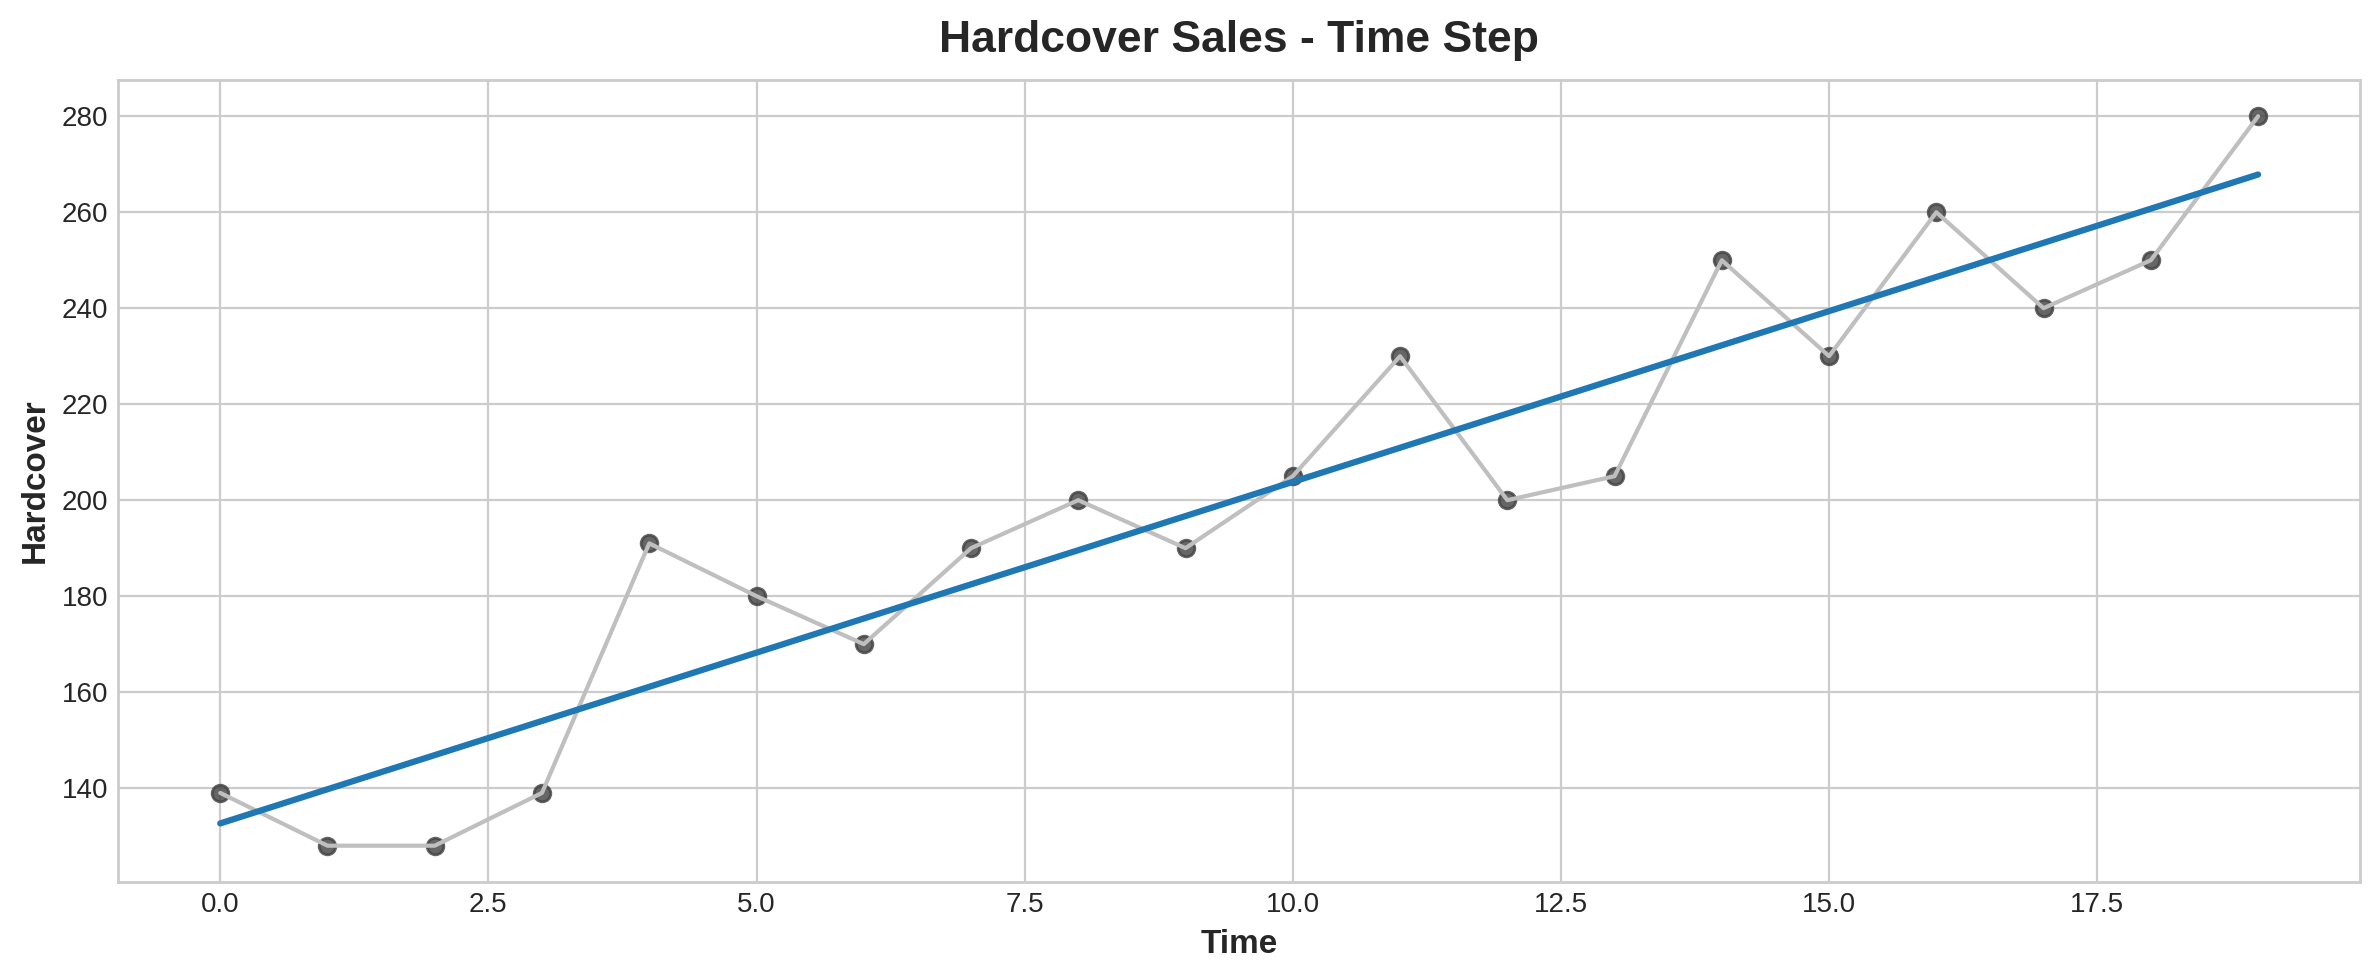

In [4]:
# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(12,5), titlesize=18, titleweight='bold',)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold',titlesize=16, titlepad=10,)
plot_params = dict(color='0.75',style='.-',markeredgecolor='0.25', markerfacecolor='0.25',legend=False,)
%config InlineBackend.figure_format ='retina'

# Plot time-step features
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Hardcover Sales - Time Step');

#### Lag features
- observations of the target sereies appear to have occured later in time

In [5]:
# 1-step lag feature
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])
df.head()

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,128,128.0
2000-04-04,139,128.0
2000-04-05,191,139.0


Linear regression with a lag feature produces the model:
 - target = weight * lag + bias
 
Each observation in a series is plotted against the previous observation.

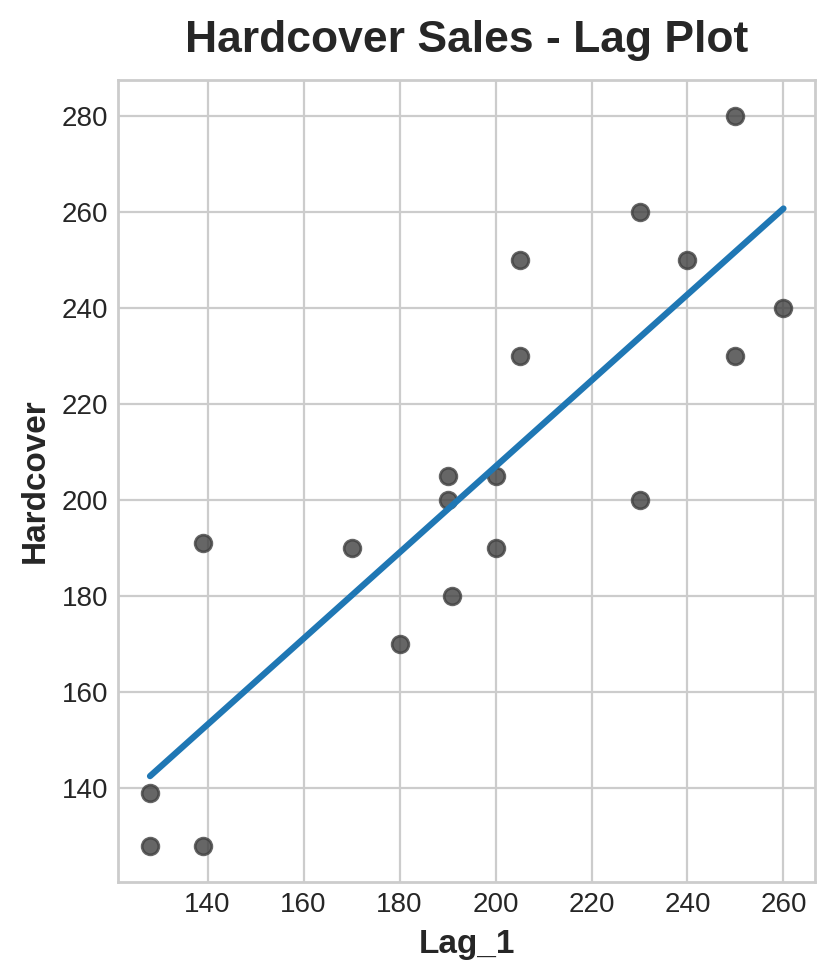

In [6]:
# Plot lag features
fig , ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Hardcover Sales - Lag Plot');

Lag features let you model serial dependence
 - A time series has serial dependence when an observation can be predicted from previous observations

## Tunnel Traffic

Time series describing number of vehicles traveling through the Baregg Tunnel in Switzerland each day from November 2003 to November 2005.

In [7]:
# Load dataset
tunnel_df = pd.read_csv("~/Documents/Projects/machine-learning/datasets/tunnel.csv")

In [8]:
# Create time series
tunnel_df = tunnel_df.set_index('Day')
tunnel_df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


#### Time-step feature

In [9]:
# Time dummy
time_df = tunnel_df.copy()
time_df['Time'] = np.arange(len(time_df.index))
time_df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [10]:
# Training data
X = time_df.loc[:, ['Time']]  #features
y = time_df.loc[:, 'NumVehicles']  #target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series
target_pred = pd.Series(model.predict(X), index=X.index)

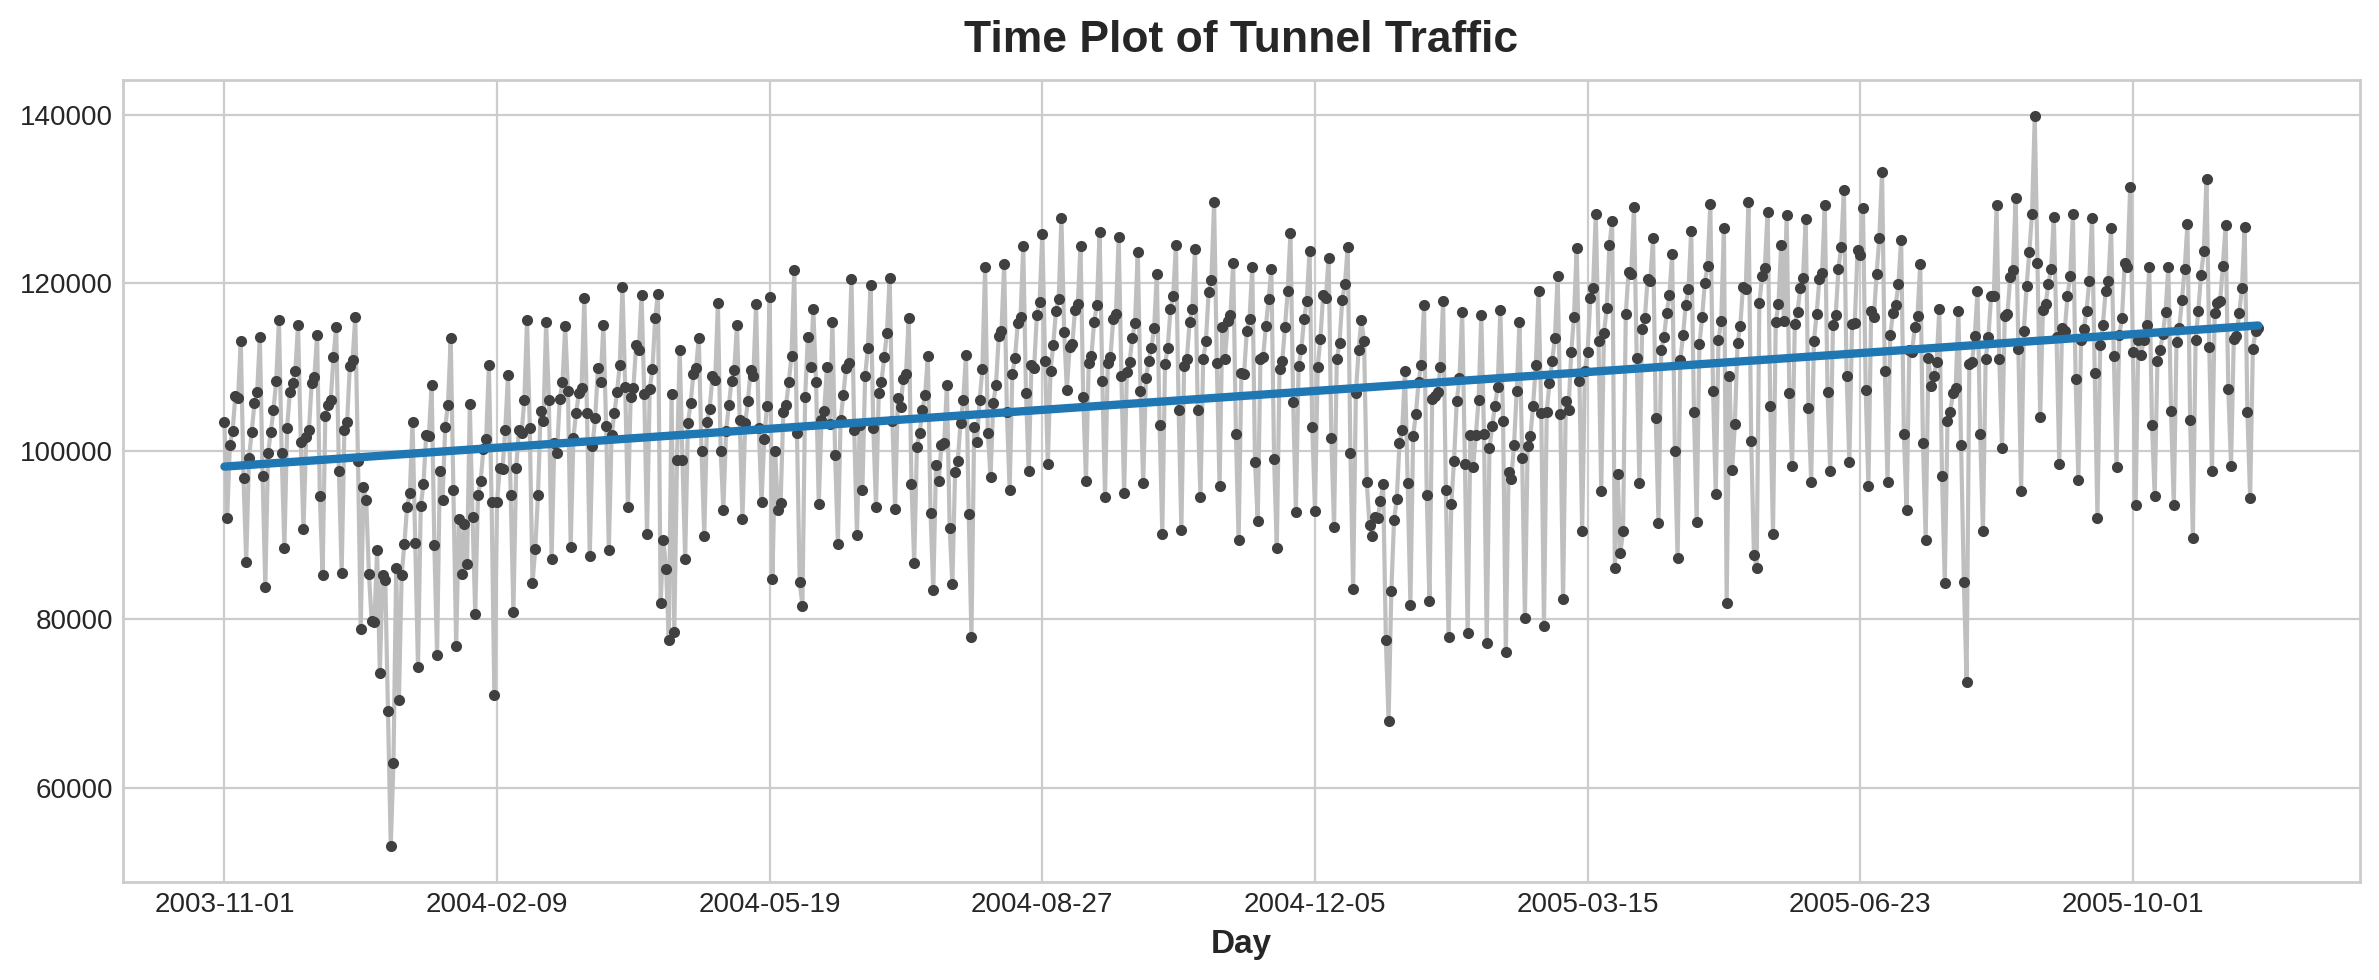

In [11]:
# Plot the fitted values
ax = y.plot(**plot_params)
ax = target_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

#### Lag feature

With shift method in pandas, we can create a lag series

In [12]:
# Create lag series
time_df['Lag_1'] = time_df['NumVehicles'].shift(1)
time_df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


Dealing with missing values:
 - filling them (with `0.0` or `backfilling` with first known value)
 - drop them

In [13]:
# Define training data
X = time_df.loc[:, ['Lag_1']] # create feature set
X.dropna(inplace=True) # drop missing values in the feature set
y = time_df.loc[:, 'NumVehicles'] # create the target
y, X = y.align(X, join='inner') # drop corresponding values in target

# Train the model
model = LinearRegression()
model.fit(X,y)

# Store fitted values
target_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

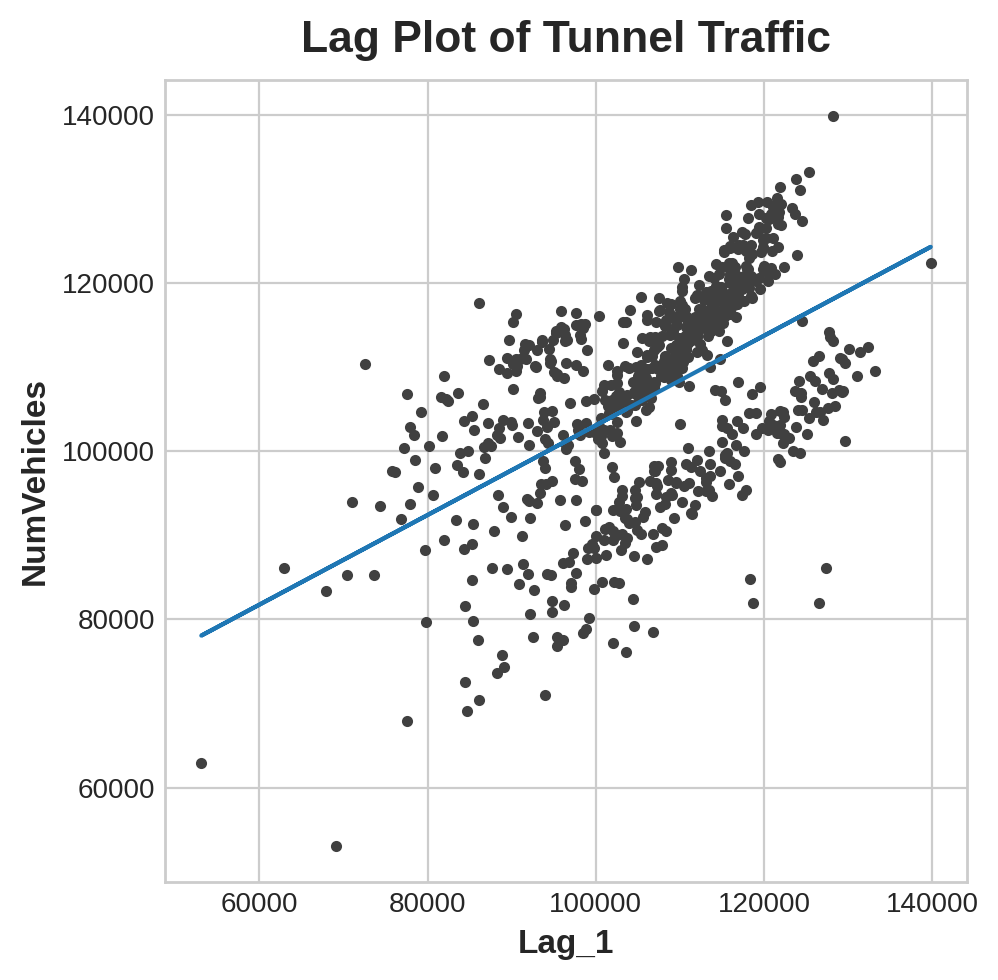

In [14]:
# Plot lag feature
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], target_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

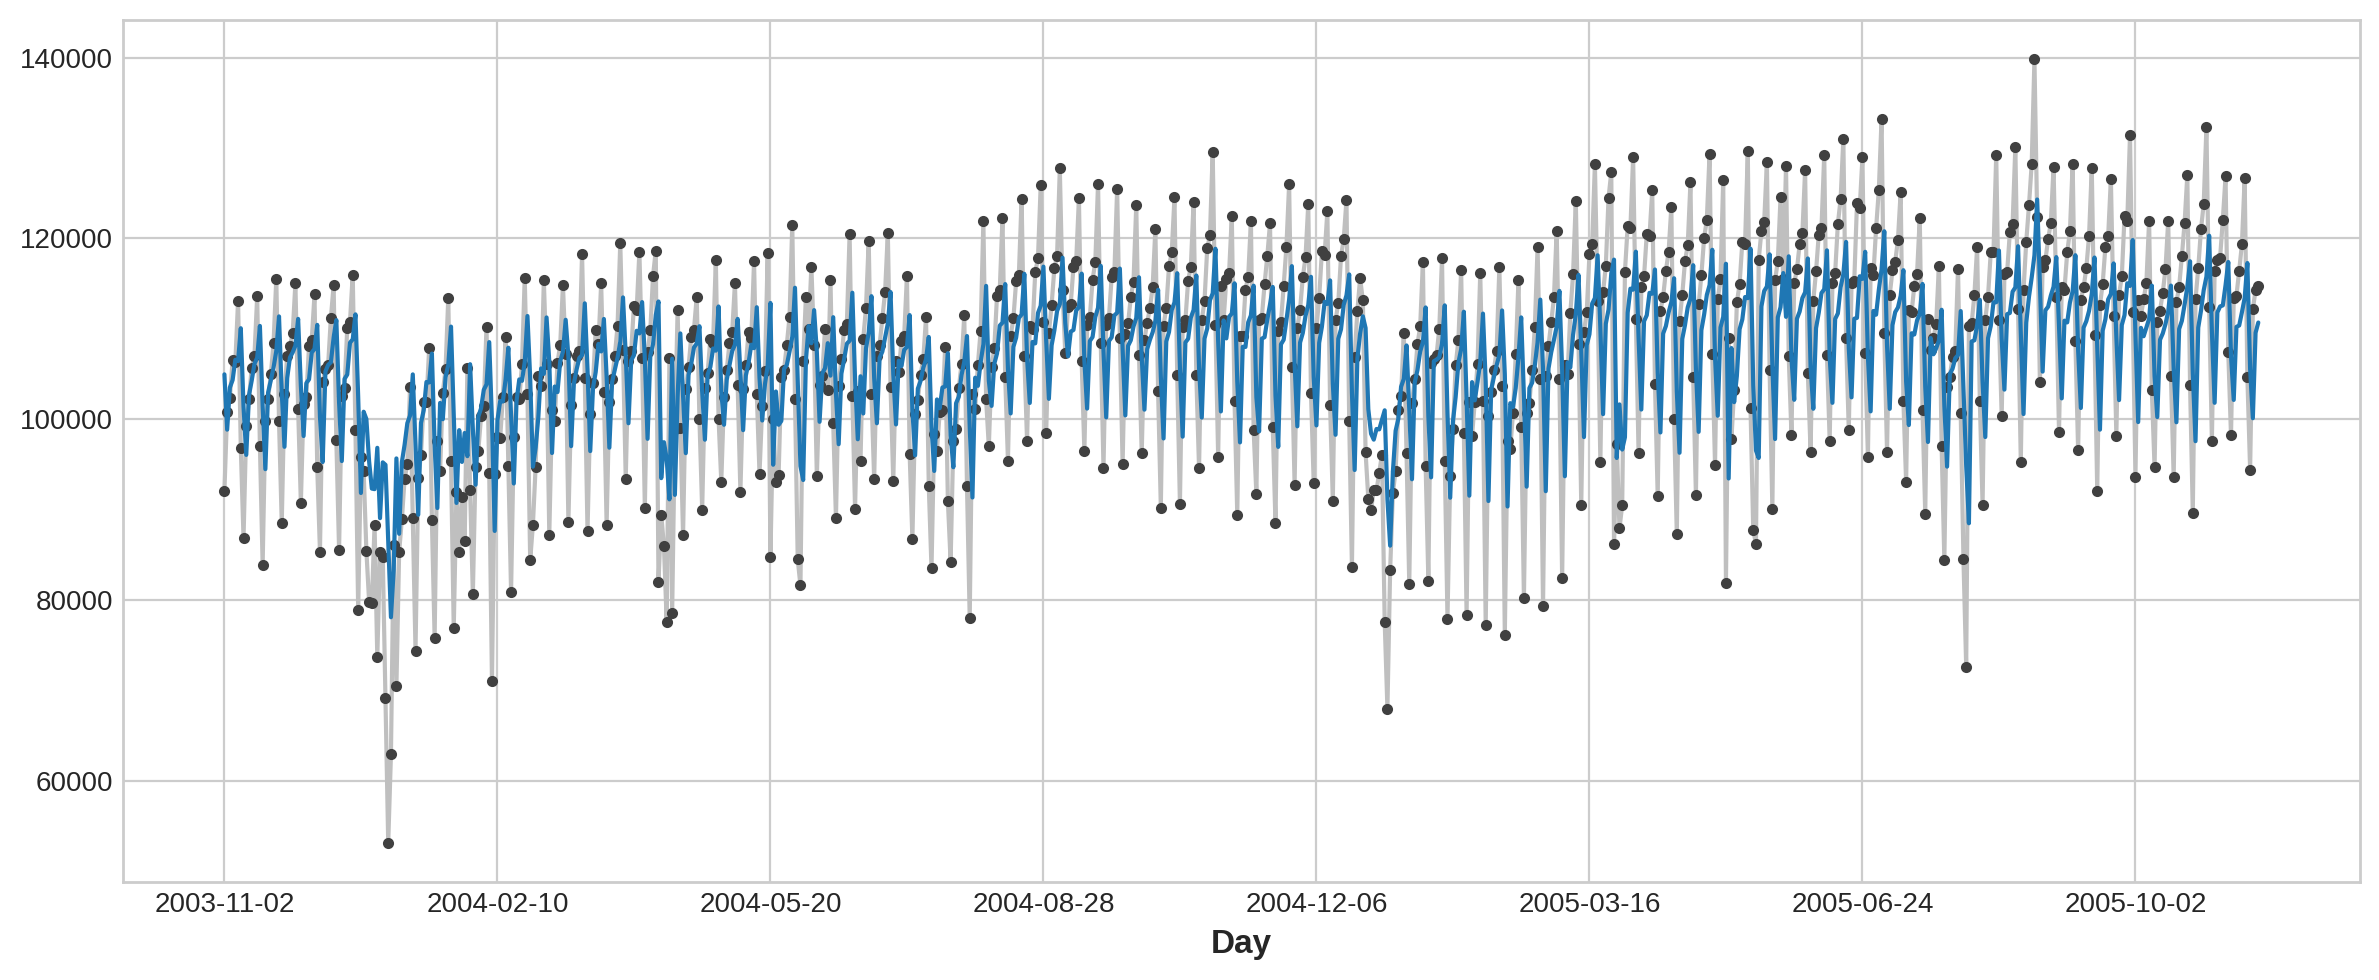

In [16]:
# Series prediction across time
ax = y.plot(**plot_params)
ax=target_pred.plot()